In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv("tested.csv")
print(data.shape)

(418, 12)


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
data.isnull().sum().sort_values(ascending= False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [ ]:
data = data.drop(columns='Cabin', axis=1)

In [ ]:
!pip install MissForest

In [ ]:
from missforest.missforest import MissForest

# Create the MissForest imputer
imputer = MissForest()

# Apply MissForest imputation
imputed_data = imputer.fit_transform(data)


In [ ]:
imputed_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,0,0,34.5,0,0,0,7.8292,0
1,893,1,3,1,1,47.0,1,0,1,7.0000,1
2,894,0,2,2,0,62.0,0,0,2,9.6875,0
3,895,0,3,3,0,27.0,0,0,3,8.6625,1
4,896,1,3,4,1,22.0,1,1,4,12.2875,1
5,897,0,3,5,0,14.0,0,0,5,9.2250,1
6,898,1,3,6,1,30.0,0,0,6,7.6292,0
7,899,0,2,7,0,26.0,1,1,7,29.0000,1
8,900,1,3,8,1,18.0,0,0,8,7.2292,2
9,901,0,3,9,0,21.0,2,0,9,24.1500,1


In [ ]:
imputed_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
imputed_data.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,208.500000,0.363636,29.599282,0.447368,0.392344,173.497608,35.575457,1.133971
std,120.810458,0.481622,0.841838,120.810458,0.481622,12.703770,0.896760,0.981429,103.461117,55.850516,0.580452
min,892.000000,0.000000,1.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,104.250000,0.000000,23.000000,0.000000,0.000000,83.250000,7.895800,1.000000
50%,1100.500000,0.000000,3.000000,208.500000,0.000000,27.000000,0.000000,0.000000,170.500000,14.454200,1.000000
75%,1204.750000,1.000000,3.000000,312.750000,1.000000,35.750000,1.000000,0.000000,260.750000,31.471875,1.000000
max,1309.000000,1.000000,3.000000,417.000000,1.000000,76.000000,8.000000,9.000000,362.000000,512.329200,2.000000


In [ ]:
#finding the number of people survived and not survived
imputed_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

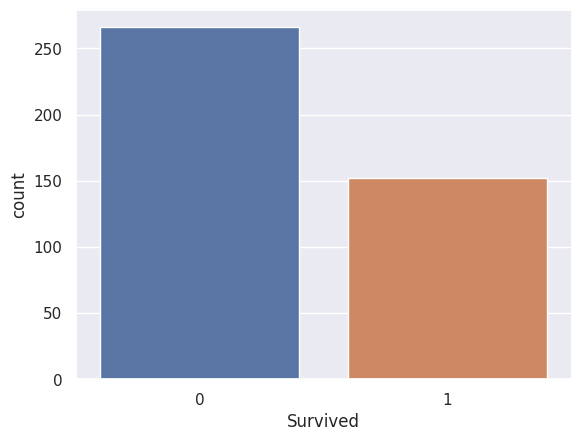

In [ ]:
sns.countplot(x='Survived', data=imputed_data)

In [ ]:
imputed_data['Sex'].value_counts()

0    266
1    152
Name: Sex, dtype: int64

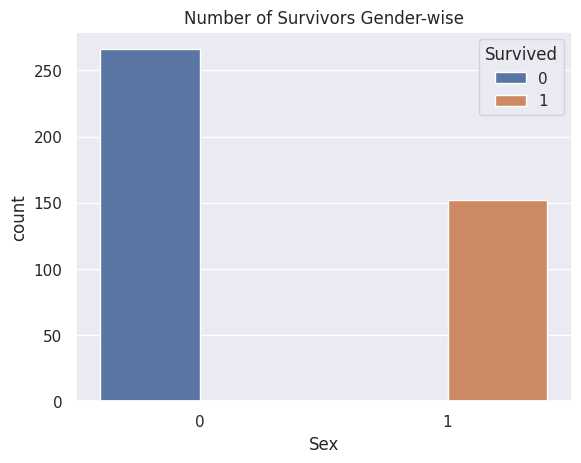

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=imputed_data)
plt.title('Number of Survivors Gender-wise')
plt.show()

In [ ]:
imputed_data['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

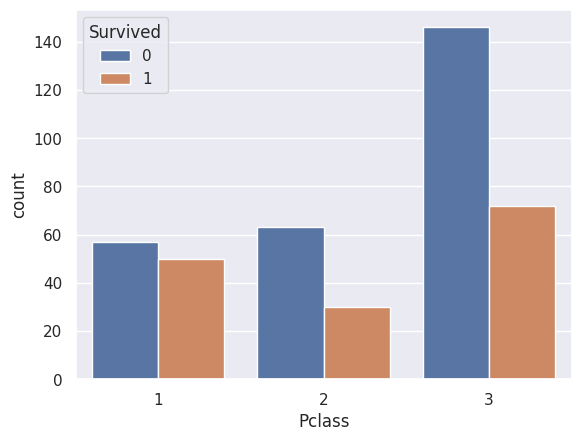

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=imputed_data)

In [ ]:
from  sklearn.preprocessing import OneHotEncoder

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'imputed_data' is your DataFrame containing the Titanic data with imputed values
categorical_data = imputed_data[["Sex", "Embarked"]]

encoder = OneHotEncoder()
one_hot_encoded_data = encoder.fit_transform(categorical_data)

# Converting the sparse matrix to a DataFrame
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_data.columns))

print(one_hot_encoded_df)


     Sex_0  Sex_1  Embarked_0  Embarked_1  Embarked_2
0      1.0    0.0         1.0         0.0         0.0
1      0.0    1.0         0.0         1.0         0.0
2      1.0    0.0         1.0         0.0         0.0
3      1.0    0.0         0.0         1.0         0.0
4      0.0    1.0         0.0         1.0         0.0
..     ...    ...         ...         ...         ...
413    1.0    0.0         0.0         1.0         0.0
414    0.0    1.0         0.0         0.0         1.0
415    1.0    0.0         0.0         1.0         0.0
416    1.0    0.0         0.0         1.0         0.0
417    1.0    0.0         0.0         0.0         1.0

[418 rows x 5 columns]


In [ ]:
imputed_data = imputed_data.drop(columns = ['PassengerId','Name','Ticket','Sex','Embarked'],axis=1)
imputed_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,34.5,0,0,7.8292
1,1,3,47.0,1,0,7.0000
2,0,2,62.0,0,0,9.6875
3,0,3,27.0,0,0,8.6625
4,1,3,22.0,1,1,12.2875


In [ ]:
original_data=pd.DataFrame(imputed_data)
resulting_data = pd.concat([original_data, one_hot_encoded_df], axis=1)

In [ ]:
resulting_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,0,3,34.5,0,0,7.8292,1.0,0.0,1.0,0.0,0.0
1,1,3,47.0,1,0,7.0000,0.0,1.0,0.0,1.0,0.0
2,0,2,62.0,0,0,9.6875,1.0,0.0,1.0,0.0,0.0
3,0,3,27.0,0,0,8.6625,1.0,0.0,0.0,1.0,0.0
4,1,3,22.0,1,1,12.2875,0.0,1.0,0.0,1.0,0.0


In [ ]:
X=resulting_data.drop(["Survived"],axis=1)
y=resulting_data["Survived"]

In [ ]:
print(X)

     Pclass   Age  SibSp  Parch      Fare  Sex_0  Sex_1  Embarked_0  \
0         3  34.5      0      0    7.8292    1.0    0.0         1.0   
1         3  47.0      1      0    7.0000    0.0    1.0         0.0   
2         2  62.0      0      0    9.6875    1.0    0.0         1.0   
3         3  27.0      0      0    8.6625    1.0    0.0         0.0   
4         3  22.0      1      1   12.2875    0.0    1.0         0.0   
..      ...   ...    ...    ...       ...    ...    ...         ...   
413       3  27.0      0      0    8.0500    1.0    0.0         0.0   
414       1  39.0      0      0  108.9000    0.0    1.0         0.0   
415       3  38.5      0      0    7.2500    1.0    0.0         0.0   
416       3  27.0      0      0    8.0500    1.0    0.0         0.0   
417       3  27.0      1      1   22.3583    1.0    0.0         0.0   

     Embarked_1  Embarked_2  
0           0.0         0.0  
1           1.0         0.0  
2           0.0         0.0  
3           1.0         0.0

In [ ]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [ ]:
print(X_train.shape)

(334, 10)


In [ ]:
print(X_test.shape)

(84, 10)


In [ ]:
print(y_train.shape)

(334,)


In [ ]:
print(y_test.shape)

(84,)


In [ ]:
model = LogisticRegression()

In [ ]:
#Training the Logistic Regression model with training data

model.fit(X_train, y_train)
# accuracy on test data

X_test_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
test_data_accuracy = accuracy_score(y_test, X_test_pred)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0
